# Simple Autoencoder

In [12]:
# import keras
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [13]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [14]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [15]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [16]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [17]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 3s 11ms/step - loss: 0.2759 - val_loss: 0.1867
Epoch 2/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1683 - val_loss: 0.1515
Epoch 3/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1426 - val_loss: 0.1325
Epoch 4/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1275 - val_loss: 0.1203
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1170 - val_loss: 0.1114
Epoch 6/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1096 - val_loss: 0.1053
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1045 - val_loss: 0.1012
Epoch 8/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1010 - val_loss: 0.0984
Epoch 9/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0986 - val_loss: 0.0965
Epoch 10/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0970 - val_loss: 0.095

In [9]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 1ms/step


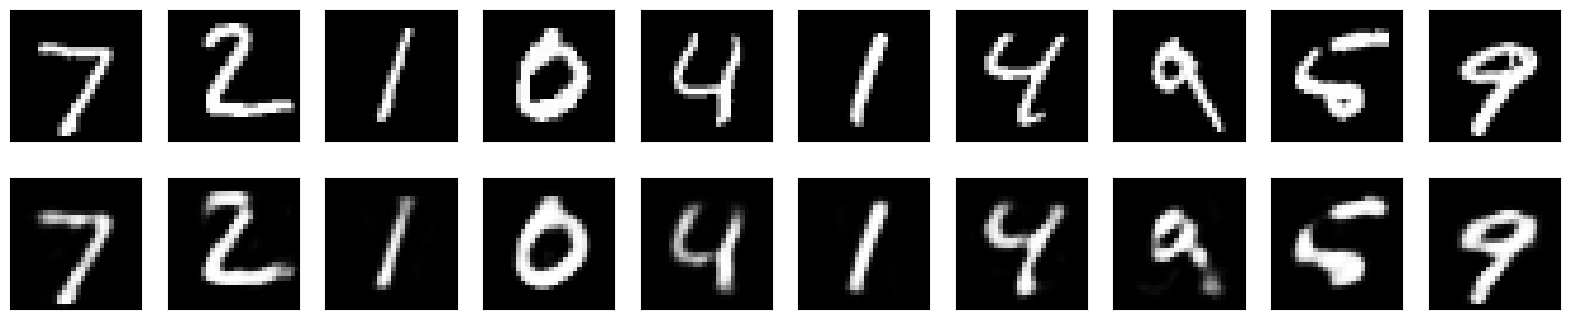

In [10]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Adding a sparsity constraint on the encoded representations

In [18]:
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [19]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [20]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [21]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [17]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1007 - val_loss: 0.0995
Epoch 2/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1006 - val_loss: 0.0994
Epoch 3/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1005 - val_loss: 0.0992
Epoch 4/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1003 - val_loss: 0.0991
Epoch 5/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1002 - val_loss: 0.0990
Epoch 6/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1001 - val_loss: 0.0989
Epoch 7/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1000 - val_loss: 0.0988
Epoch 8/100
235/235 [==============================] - 2s 9ms/step - loss: 0.0999 - val_loss: 0.0987
Epoch 9/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0998 - val_loss: 0.0987
Epoch 10/100
235/235 [==============================] - 2s 9ms/step - loss: 0.0997 - val_lo

235/235 [==============================] - 2s 10ms/step - loss: 0.0967 - val_loss: 0.0956
Epoch 82/100
235/235 [==============================] - 2s 9ms/step - loss: 0.0966 - val_loss: 0.0955
Epoch 83/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0966 - val_loss: 0.0956
Epoch 84/100
235/235 [==============================] - 2s 9ms/step - loss: 0.0966 - val_loss: 0.0956
Epoch 85/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0966 - val_loss: 0.0955
Epoch 86/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0966 - val_loss: 0.0955
Epoch 87/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0965 - val_loss: 0.0955
Epoch 88/100
235/235 [==============================] - 2s 9ms/step - loss: 0.0965 - val_loss: 0.0955
Epoch 89/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0965 - val_loss: 0.0954
Epoch 90/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0965 - val_loss

In [18]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 1ms/step


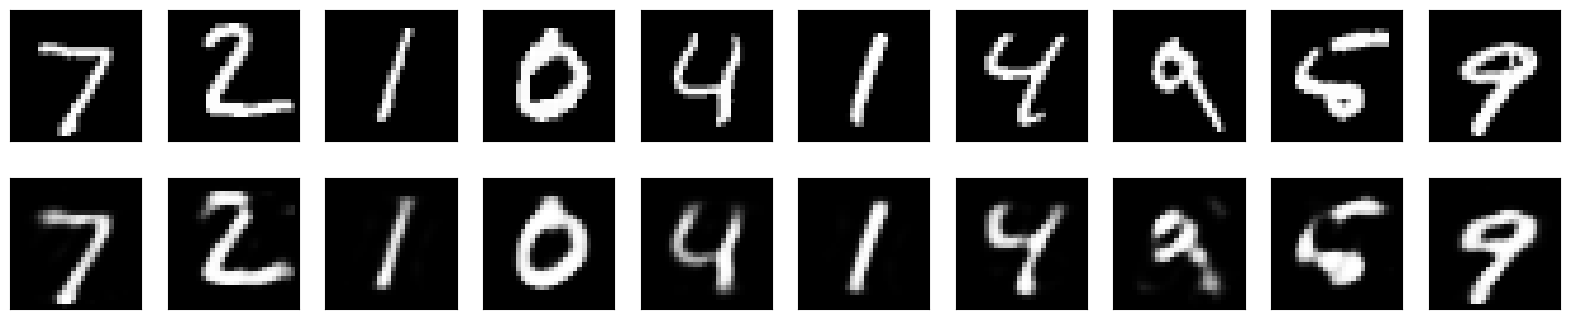

In [19]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Deep autoencoder

In [20]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [21]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 4s 11ms/step - loss: 0.2469 - val_loss: 0.1685
Epoch 2/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1496 - val_loss: 0.1359
Epoch 3/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1315 - val_loss: 0.1240
Epoch 4/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1217 - val_loss: 0.1167
Epoch 5/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1157 - val_loss: 0.1119
Epoch 6/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1116 - val_loss: 0.1082
Epoch 7/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1087 - val_loss: 0.1064
Epoch 8/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1061 - val_loss: 0.1034
Epoch 9/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1036 - val_loss: 0.1015
Epoch 10/100
235/235 [==============================] - 3s 11ms/step - loss: 0.101

235/235 [==============================] - 3s 15ms/step - loss: 0.0821 - val_loss: 0.0818
Epoch 81/100
235/235 [==============================] - 3s 13ms/step - loss: 0.0821 - val_loss: 0.0818
Epoch 82/100
235/235 [==============================] - 4s 18ms/step - loss: 0.0820 - val_loss: 0.0820
Epoch 83/100
235/235 [==============================] - 4s 16ms/step - loss: 0.0820 - val_loss: 0.0816
Epoch 84/100
235/235 [==============================] - 3s 13ms/step - loss: 0.0819 - val_loss: 0.0818
Epoch 85/100
235/235 [==============================] - 3s 12ms/step - loss: 0.0819 - val_loss: 0.0817
Epoch 86/100
235/235 [==============================] - 3s 13ms/step - loss: 0.0818 - val_loss: 0.0816
Epoch 87/100
235/235 [==============================] - 3s 12ms/step - loss: 0.0818 - val_loss: 0.0816
Epoch 88/100
235/235 [==============================] - 3s 11ms/step - loss: 0.0818 - val_loss: 0.0815
Epoch 89/100
235/235 [==============================] - 3s 11ms/step - loss: 0.0818 - 

In [22]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 1ms/step


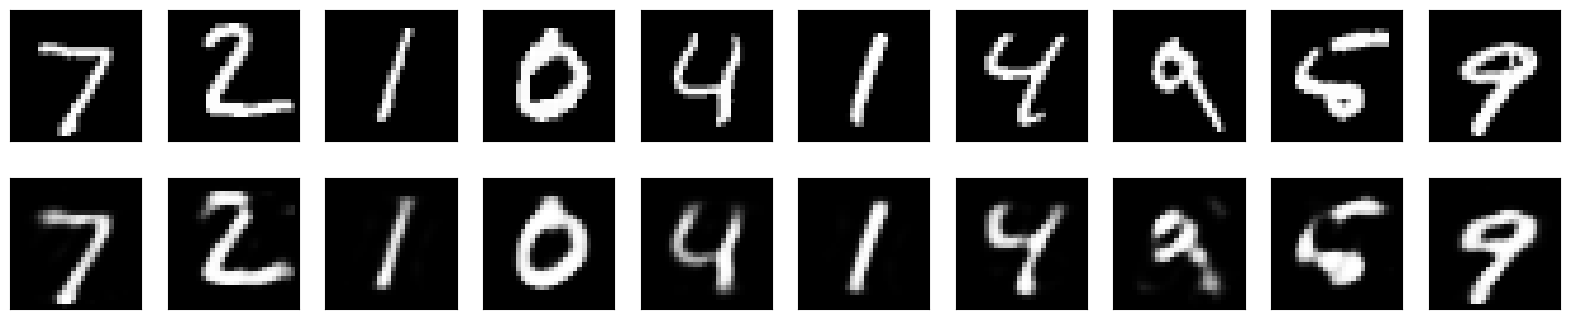

In [23]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convolutional Autoencoder

In [26]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [27]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [28]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/50
469/469 [==============================] - 66s 138ms/step - loss: 0.2163 - val_loss: 0.1447
Epoch 2/50
469/469 [==============================] - 63s 133ms/step - loss: 0.1366 - val_loss: 0.1284
Epoch 3/50
469/469 [==============================] - 61s 130ms/step - loss: 0.1247 - val_loss: 0.1192
Epoch 4/50
469/469 [==============================] - 62s 133ms/step - loss: 0.1179 - val_loss: 0.1141
Epoch 5/50
469/469 [==============================] - 63s 135ms/step - loss: 0.1139 - val_loss: 0.1111
Epoch 6/50
469/469 [==============================] - 61s 130ms/step - loss: 0.1113 - val_loss: 0.1087
Epoch 7/50
469/469 [==============================] - 63s 134ms/step - loss: 0.1093 - val_loss: 0.1075
Epoch 8/50
469/469 [==============================] - 59s 125ms/step - loss: 0.1078 - val_loss: 0.1059
Epoch 9/50
469/469 [==============================] - 57s 121ms/step - loss: 0.1065 - val_loss: 0.1045
Epoch 10/50
469/469 [==============================] - 58s 124ms/step - l

313/313 [==============================] - 3s 11ms/step


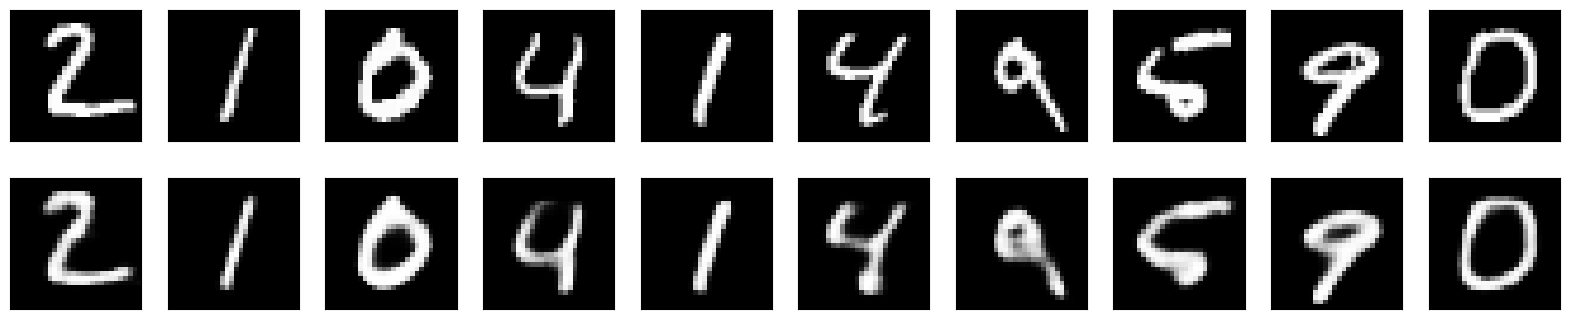

In [31]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

313/313 [==============================] - 1s 4ms/step


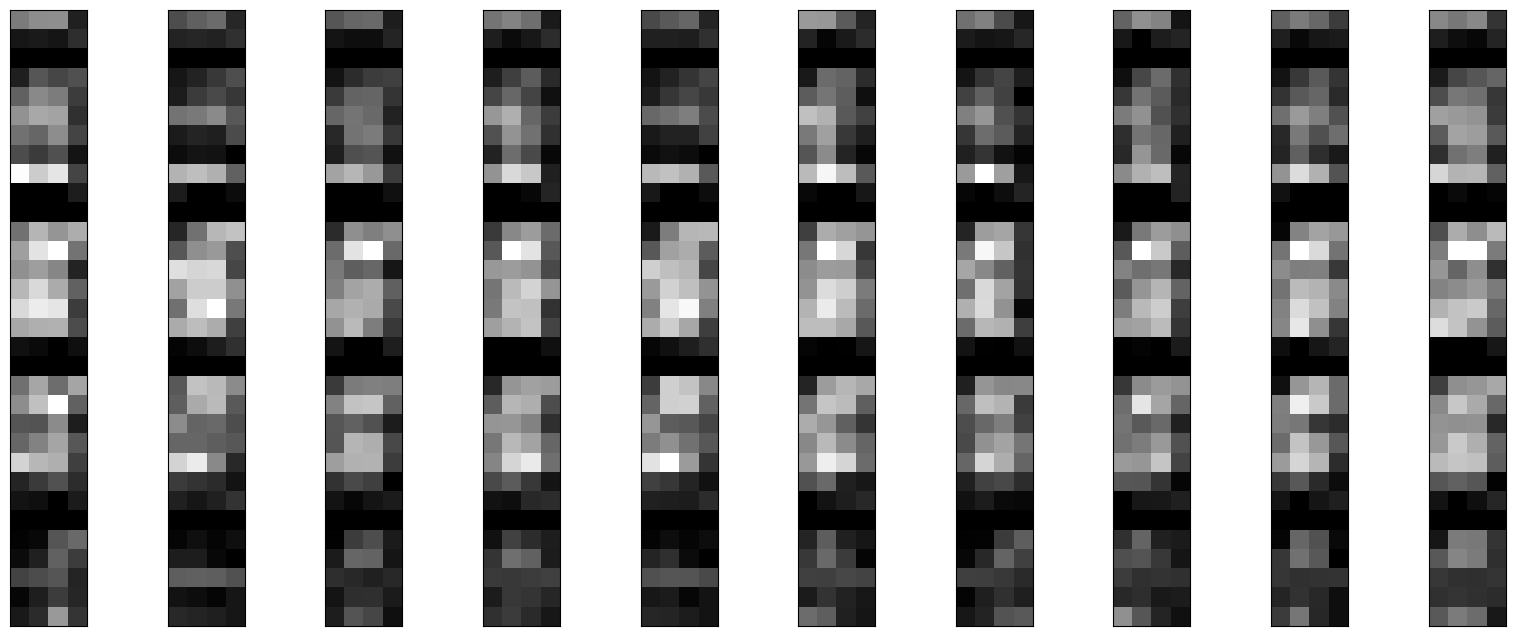

In [32]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Image Denoising

In [26]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

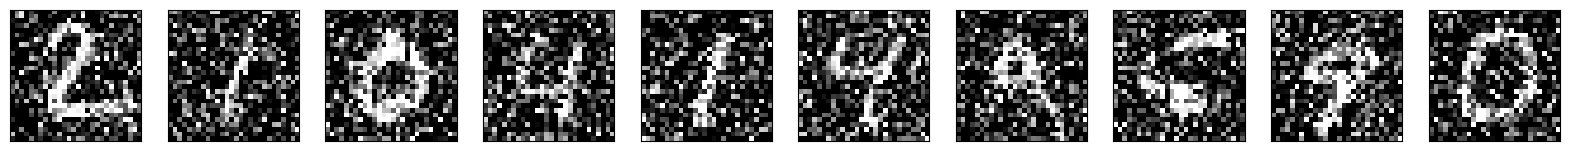

In [27]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [28]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [29]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

NameError: name 'TensorBoard' is not defined

# Sequence to Sequence AutoEncoder

In [ ]:
'''
timesteps = ...  # Length of your sequences
input_dim = ... 
latent_dim = ...

inputs = keras.Input(shape=(timesteps, input_dim))
encoded = layers.LSTM(latent_dim)(inputs)

decoded = layers.RepeatVector(timesteps)(encoded)
decoded = layers.LSTM(input_dim, return_sequences=True)(decoded)

sequence_autoencoder = keras.Model(inputs, decoded)
encoder = keras.Model(inputs, encoded)'''

# Variational autoencoder

In [30]:
original_dim = 28 * 28
intermediate_dim = 64
latent_dim = 2

inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

In [31]:
from keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

In [32]:
# Create encoder
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

In [33]:
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

In [36]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train, x_train,
        epochs=100,
        batch_size=32,
        validation_data=(x_test, x_test))

Epoch 1/100
1875/1875 [==============================] - 7s 3ms/step - loss: 144.2410 - val_loss: 146.3244
Epoch 2/100
1875/1875 [==============================] - 7s 4ms/step - loss: 144.1889 - val_loss: 146.5995
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 144.1991 - val_loss: 146.8062
Epoch 4/100
1875/1875 [==============================] - 6s 3ms/step - loss: 144.1425 - val_loss: 146.4745
Epoch 5/100
1875/1875 [==============================] - 8s 4ms/step - loss: 144.1546 - val_loss: 146.9101
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 144.1051 - val_loss: 146.7977
Epoch 7/100
1875/1875 [==============================] - 6s 3ms/step - loss: 144.0711 - val_loss: 146.2993
Epoch 8/100
1875/1875 [==============================] - 6s 3ms/step - loss: 144.0684 - val_loss: 146.5011
Epoch 9/100
1875/1875 [==============================] - 5s 3ms/step - loss: 144.0724 - val_loss: 146.7591
Epoch 10/100
1875/1875 [=============

Epoch 77/100
1875/1875 [==============================] - 6s 3ms/step - loss: 142.9449 - val_loss: 146.0668
Epoch 78/100
1875/1875 [==============================] - 7s 4ms/step - loss: 142.9560 - val_loss: 145.8372
Epoch 79/100
1875/1875 [==============================] - 6s 3ms/step - loss: 142.9137 - val_loss: 145.9767
Epoch 80/100
1875/1875 [==============================] - 6s 3ms/step - loss: 142.9294 - val_loss: 145.9656
Epoch 81/100
1875/1875 [==============================] - 7s 3ms/step - loss: 142.9190 - val_loss: 145.8713
Epoch 82/100
1875/1875 [==============================] - 6s 3ms/step - loss: 142.8899 - val_loss: 146.0014
Epoch 83/100
1875/1875 [==============================] - 6s 3ms/step - loss: 142.9277 - val_loss: 145.9453
Epoch 84/100
1875/1875 [==============================] - 6s 3ms/step - loss: 142.8840 - val_loss: 145.9039
Epoch 85/100
1875/1875 [==============================] - 6s 3ms/step - loss: 142.8650 - val_loss: 145.9507
Epoch 86/100
1875/1875 [====

In [1]:
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()

NameError: name 'encoder' is not defined

In [ ]:
# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()